# Cevical Cancer Data set
## Preprocessing

**Loading libriaries**

In [725]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Reading data set using pandas**

In [726]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")

**Analyzing data**

In [727]:
data.shape

(858, 36)

In [728]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [730]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dealing with empty values**

In [731]:

data = data.replace('?', np.NaN)
data = data.apply(pd.to_numeric, errors='coerce') # Converting to numeric object type

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Droping STDs: Time since first diagnosis and last diagnosis because they have too many missing values

In [732]:
data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)

In [733]:
data = data.fillna(data.mean()) # replacing every missing value by mean ^_^

In [734]:
data.isnull().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [735]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Choosing a target**

In [736]:
data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [737]:
data['Number of sexual partners'].value_counts()

2.000000     272
3.000000     208
1.000000     206
4.000000      78
5.000000      44
2.527644      26
6.000000       9
7.000000       7
8.000000       4
9.000000       1
28.000000      1
10.000000      1
15.000000      1
Name: Number of sexual partners, dtype: int64

In [738]:
data['Schiller'].value_counts()

0    784
1     74
Name: Schiller, dtype: int64

In [739]:
data['Citology'].value_counts()

0    814
1     44
Name: Citology, dtype: int64

In [740]:
data['Hinselmann'].value_counts()

0    823
1     35
Name: Hinselmann, dtype: int64

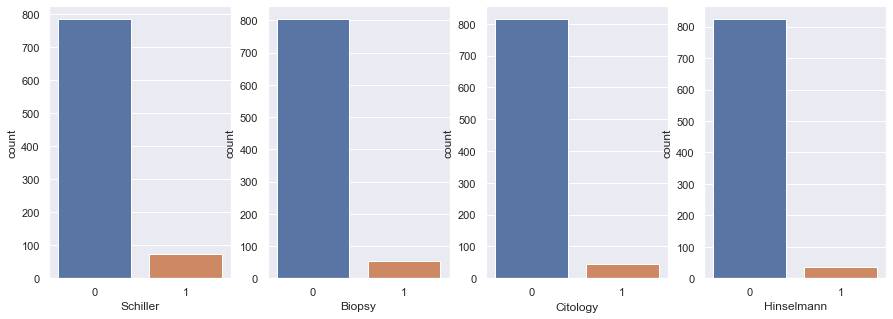

In [741]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Schiller', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.countplot(x='Citology', data=data, ax=axis3)
sns.countplot(x='Hinselmann', data= data, ax= axis4)


**Lets build a correlation plot**

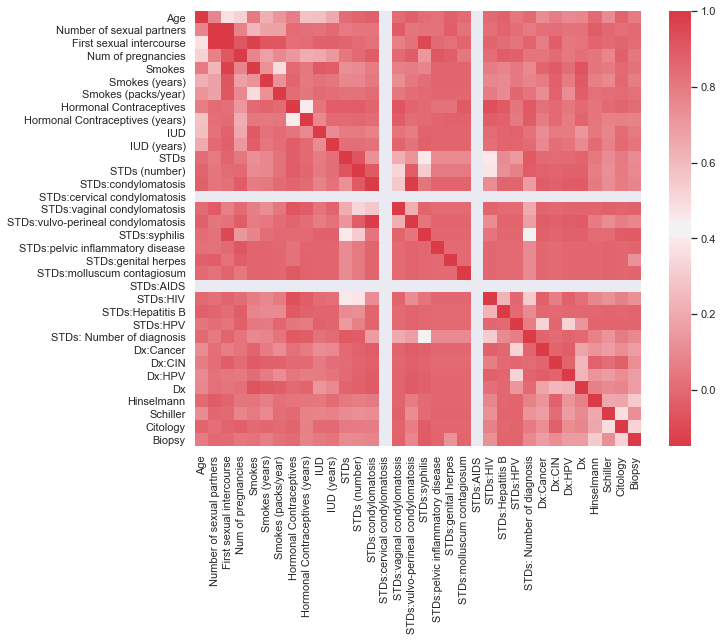

In [742]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), ax = ax)

**Top correlaction features**

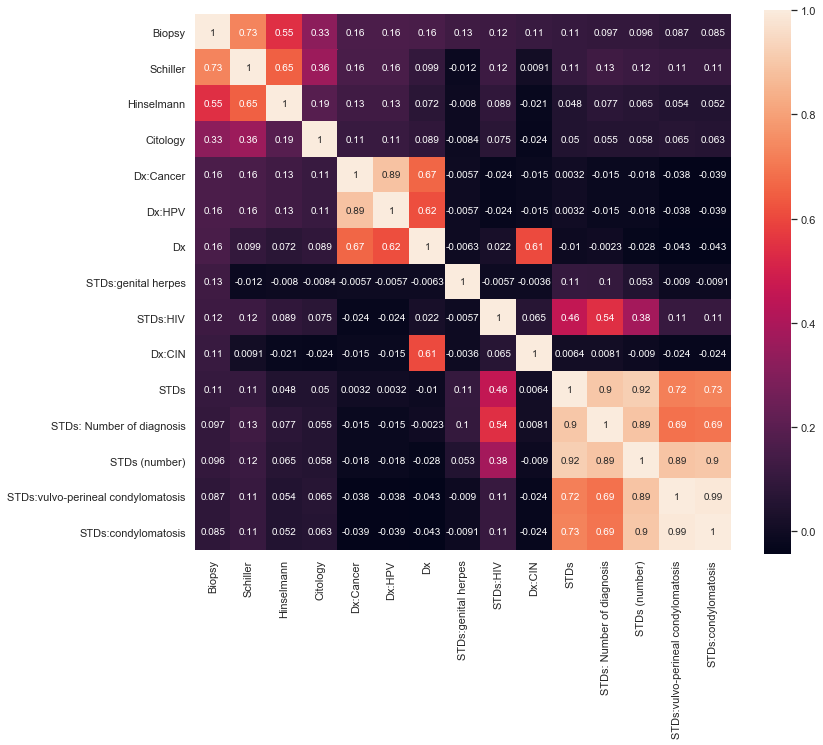

In [743]:
corr = data.corr()

cols = corr.nlargest(15, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.0)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

Out of this I can say that all Biopsy, Schiller, Hinselmann and Citology can be used as target. But im going to choose just one - Biopsy as a golden standart for cancer determination.

# Exploratory analysis

## First hypothese

It seems to me that women under 40 are more likely to suffer from cervical cancer

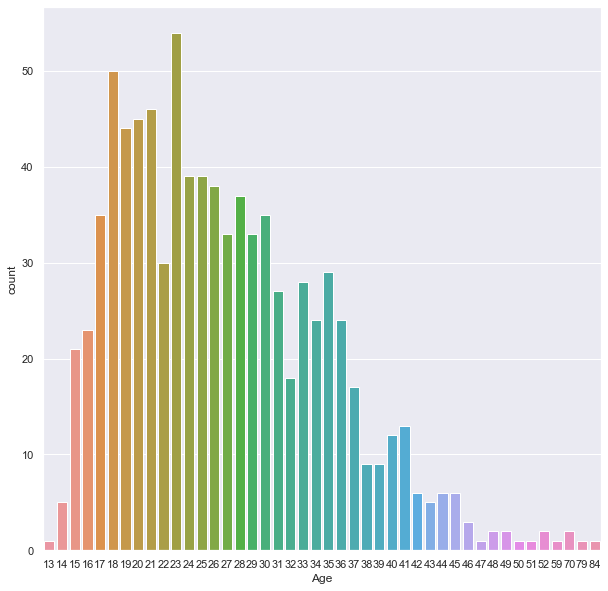

In [744]:
# Age for the whole data

fig = plt.subplots(figsize=(10,10))
sns.countplot(x='Age', data=data)




Average Age by Biopsy:
              Age
Biopsy           
0       26.696139
1       28.636364


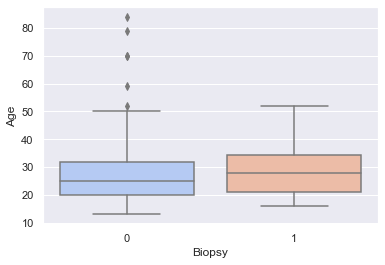

In [745]:
sns.boxplot(x="Biopsy", y="Age", data=data, palette="coolwarm")

print('\nAverage Age by Biopsy:')
print(pd.DataFrame({'Biopsy': data['Biopsy'], 'Age': data['Age']}).groupby('Biopsy').mean())

Mean of people with positive results of Biopsy is ~29 years old and about 80% of them is under 35 years

My hypothese was correct

## Second Hypothese

I suggest that the number of sexual partners affects the development of cervical cancer

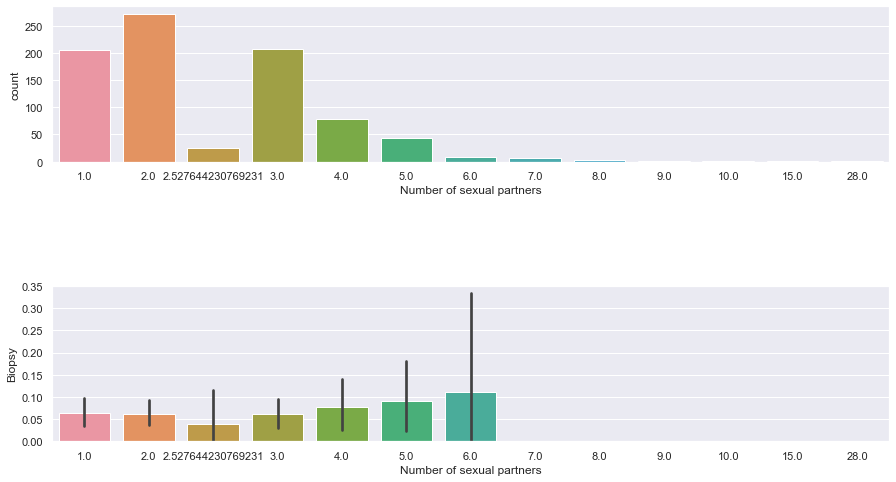

In [746]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
plt.subplots_adjust(hspace = 0.8)
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 


From the graphs it can be seen that people who have more than one sexual partner are more susceptible to cancer

## Third Hypothese

I assume that amount of pregnancies also affects the development of cervical cancer

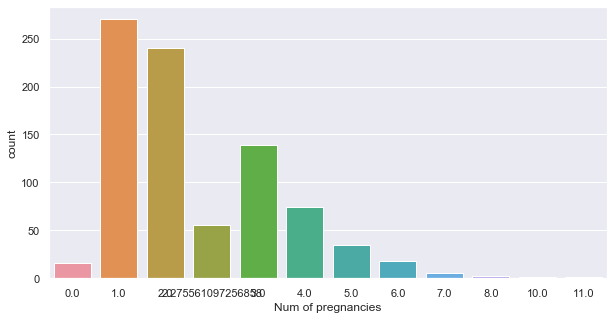

In [747]:
fig = plt.subplots(figsize=(10,5))
sns.countplot(x='Num of pregnancies', data=data)

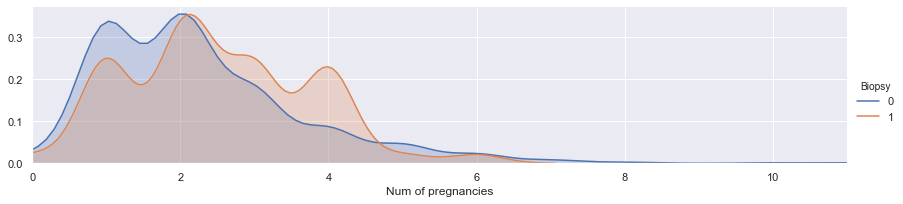

In [748]:
gg = sns.FacetGrid(data, hue='Biopsy', aspect=4)
gg.map(sns.kdeplot,'Num of pregnancies', shade= True)
gg.set(xlim=(0, data['Num of pregnancies'].max()))
gg.add_legend()

Thus I can say that number of pregnancies slitghly increase the probability of getting cevical cancer

# Metrics & Validation

**Target overview**

In [749]:
print(data['Biopsy'].value_counts()[0], 'individuals had negative biopsy results')
print(data['Biopsy'].value_counts()[1],' individuals had positive biopsy results.',)

803 individuals had negative biopsy results
55  individuals had positive biopsy results.


Since I have chosen Biopsy as my target, I can see that there are much more individuals in the negative group.

It follows that my date is unbalanced, so it’s reasonable to use  F1 score as a criteria for my models evaluation in order to balance recall and precision

**Spliting data set**

In [750]:
X = data.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], 1)
y = data['Biopsy']

In [751]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state=42, stratify=y)

# ML models

## Logistic Regression

In [767]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report


#Making a pipeline with a scaler and regression in it
pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                       ('regression', LogisticRegression(solver = 'lbfgs'))])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("F1 score of class '1' :", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score of class '1' : 0.13333333333333336
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       185
           1       0.50      0.08      0.13        13

    accuracy                           0.93       198
   macro avg       0.72      0.54      0.55       198
weighted avg       0.91      0.93      0.91       198



**Cross-Validation**

In [753]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')#I'm just getting too many warnings about f1=0 score and 0 predictions


#Using StratifiedKFold because of unbalanced data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Creating Ligistic Regression model
logreg=LogisticRegression(solver = 'lbfgs', max_iter = 1000) # Only liblinear solver supports 'l1', but i dont want to use it

#Making pipeline for scaler and model
pipe_gs = Pipeline(steps=[('scaler', StandardScaler()), 
                          ('logistic', logreg)])
#Grid for GridSearch
grid={"logistic__C":np.logspace(-0.8,3,10), "logistic__penalty":["l2"]}

#In documentation of GridSearch it is said that GridSearchCV performs Cross-Validation
logreg_cv=GridSearchCV(pipe_gs ,param_grid = grid ,cv=skf, scoring = 'f1')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'logistic__C': 54.11695265464635, 'logistic__penalty': 'l2'}


**Lets fit Logistic Regression with new parameters**

In [768]:
#Creating pipiline 
pipe_lcv = Pipeline(steps=[('scaler', StandardScaler()),
                      ('regression', LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = 54, max_iter =1000))])

pipe_lcv.fit(X_train, y_train)
y_pred = pipe_lcv.predict(X_test)

print("F1 score of Class '1':", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score of Class '1': 0.13333333333333336
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       185
           1       0.50      0.08      0.13        13

    accuracy                           0.93       198
   macro avg       0.72      0.54      0.55       198
weighted avg       0.91      0.93      0.91       198



## Gradient Boosting


In [755]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#Making pipeline with scaler and gradient bossting in it
pipe_gb = Pipeline(steps=[('scaler', StandardScaler()),
                      ('gb', GradientBoostingClassifier())])

pipe_gb.fit(X_train, y_train)

y_pred = pipe_gb.predict(X_test)

print("F1 score :", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score : 0.13333333333333336
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       185
           1       0.50      0.08      0.13        13

    accuracy                           0.93       198
   macro avg       0.72      0.54      0.55       198
weighted avg       0.91      0.93      0.91       198



**Applying GridSearch to Gradient Boosting**

In [756]:


#Using StratifiedKFold because of unbalanced data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Creating Gradient Boosting model
gbc=GradientBoostingClassifier() 

#Making pipeline for scaler and model
pipe_gsb = Pipeline(steps=[('scaler', StandardScaler()), 
                          ('gb', gbc)])
#Grid for GridSearch
grid = {"gb__max_depth": [1,3, 6, 7],
                 #"gb__max_features": ["sqrt", "log2", 2, 5, 10, 15, 20],
                 #"gb__min_samples_split": [3, 4, 5, 10],
                 #"gb__min_samples_leaf": [3, 4, 5, 10],
                 "gb__n_estimators" :[5, 10, 100, 500, 1000]
                }

#Grid searching for better parameters of the model
gb_cv=GridSearchCV(pipe_gsb ,param_grid = grid ,cv=skf, scoring = 'f1')
gb_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",gb_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'gb__max_depth': 7, 'gb__n_estimators': 100}


**Building new model according to parameters from GS**

In [757]:
#Mannualy enter the parameters from GridSearch
pipe_gbcv = Pipeline(steps=[('scaler', StandardScaler()),
                      ('gb', GradientBoostingClassifier(max_depth = 6, n_estimators = 500))])

pipe_gbcv.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("F1 score :", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score : 0.13333333333333336
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       185
           1       0.50      0.08      0.13        13

    accuracy                           0.93       198
   macro avg       0.72      0.54      0.55       198
weighted avg       0.91      0.93      0.91       198



Wow, f1-score has actually become a little bit better

## Dependency of GridSearchCV mean test score on max_depth of the tree:

In [758]:
gb_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_gb__max_depth', 'param_gb__n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [759]:
#Convert list of gridsearchcv results to DataFrame
Cv_results = pd.DataFrame.from_dict(gb_cv.cv_results_)
Cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__max_depth,param_gb__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003983,0.000056,0.000998,0.000017,1,5,"{'gb__max_depth': 1, 'gb__n_estimators': 5}",0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,18
1,0.004011,0.000045,0.001410,0.000493,1,10,"{'gb__max_depth': 1, 'gb__n_estimators': 10}",0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,18
2,0.023227,0.000062,0.001197,0.000400,1,100,"{'gb__max_depth': 1, 'gb__n_estimators': 100}",0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,18
3,0.106128,0.000615,0.001443,0.000500,1,500,"{'gb__max_depth': 1, 'gb__n_estimators': 500}",0.0,0.181818,0.0,0.000000,0.0,0.036639,0.072933,16
4,0.211878,0.001830,0.001825,0.000370,1,1000,"{'gb__max_depth': 1, 'gb__n_estimators': 1000}",0.0,0.153846,0.0,0.285714,0.0,0.087712,0.115234,10


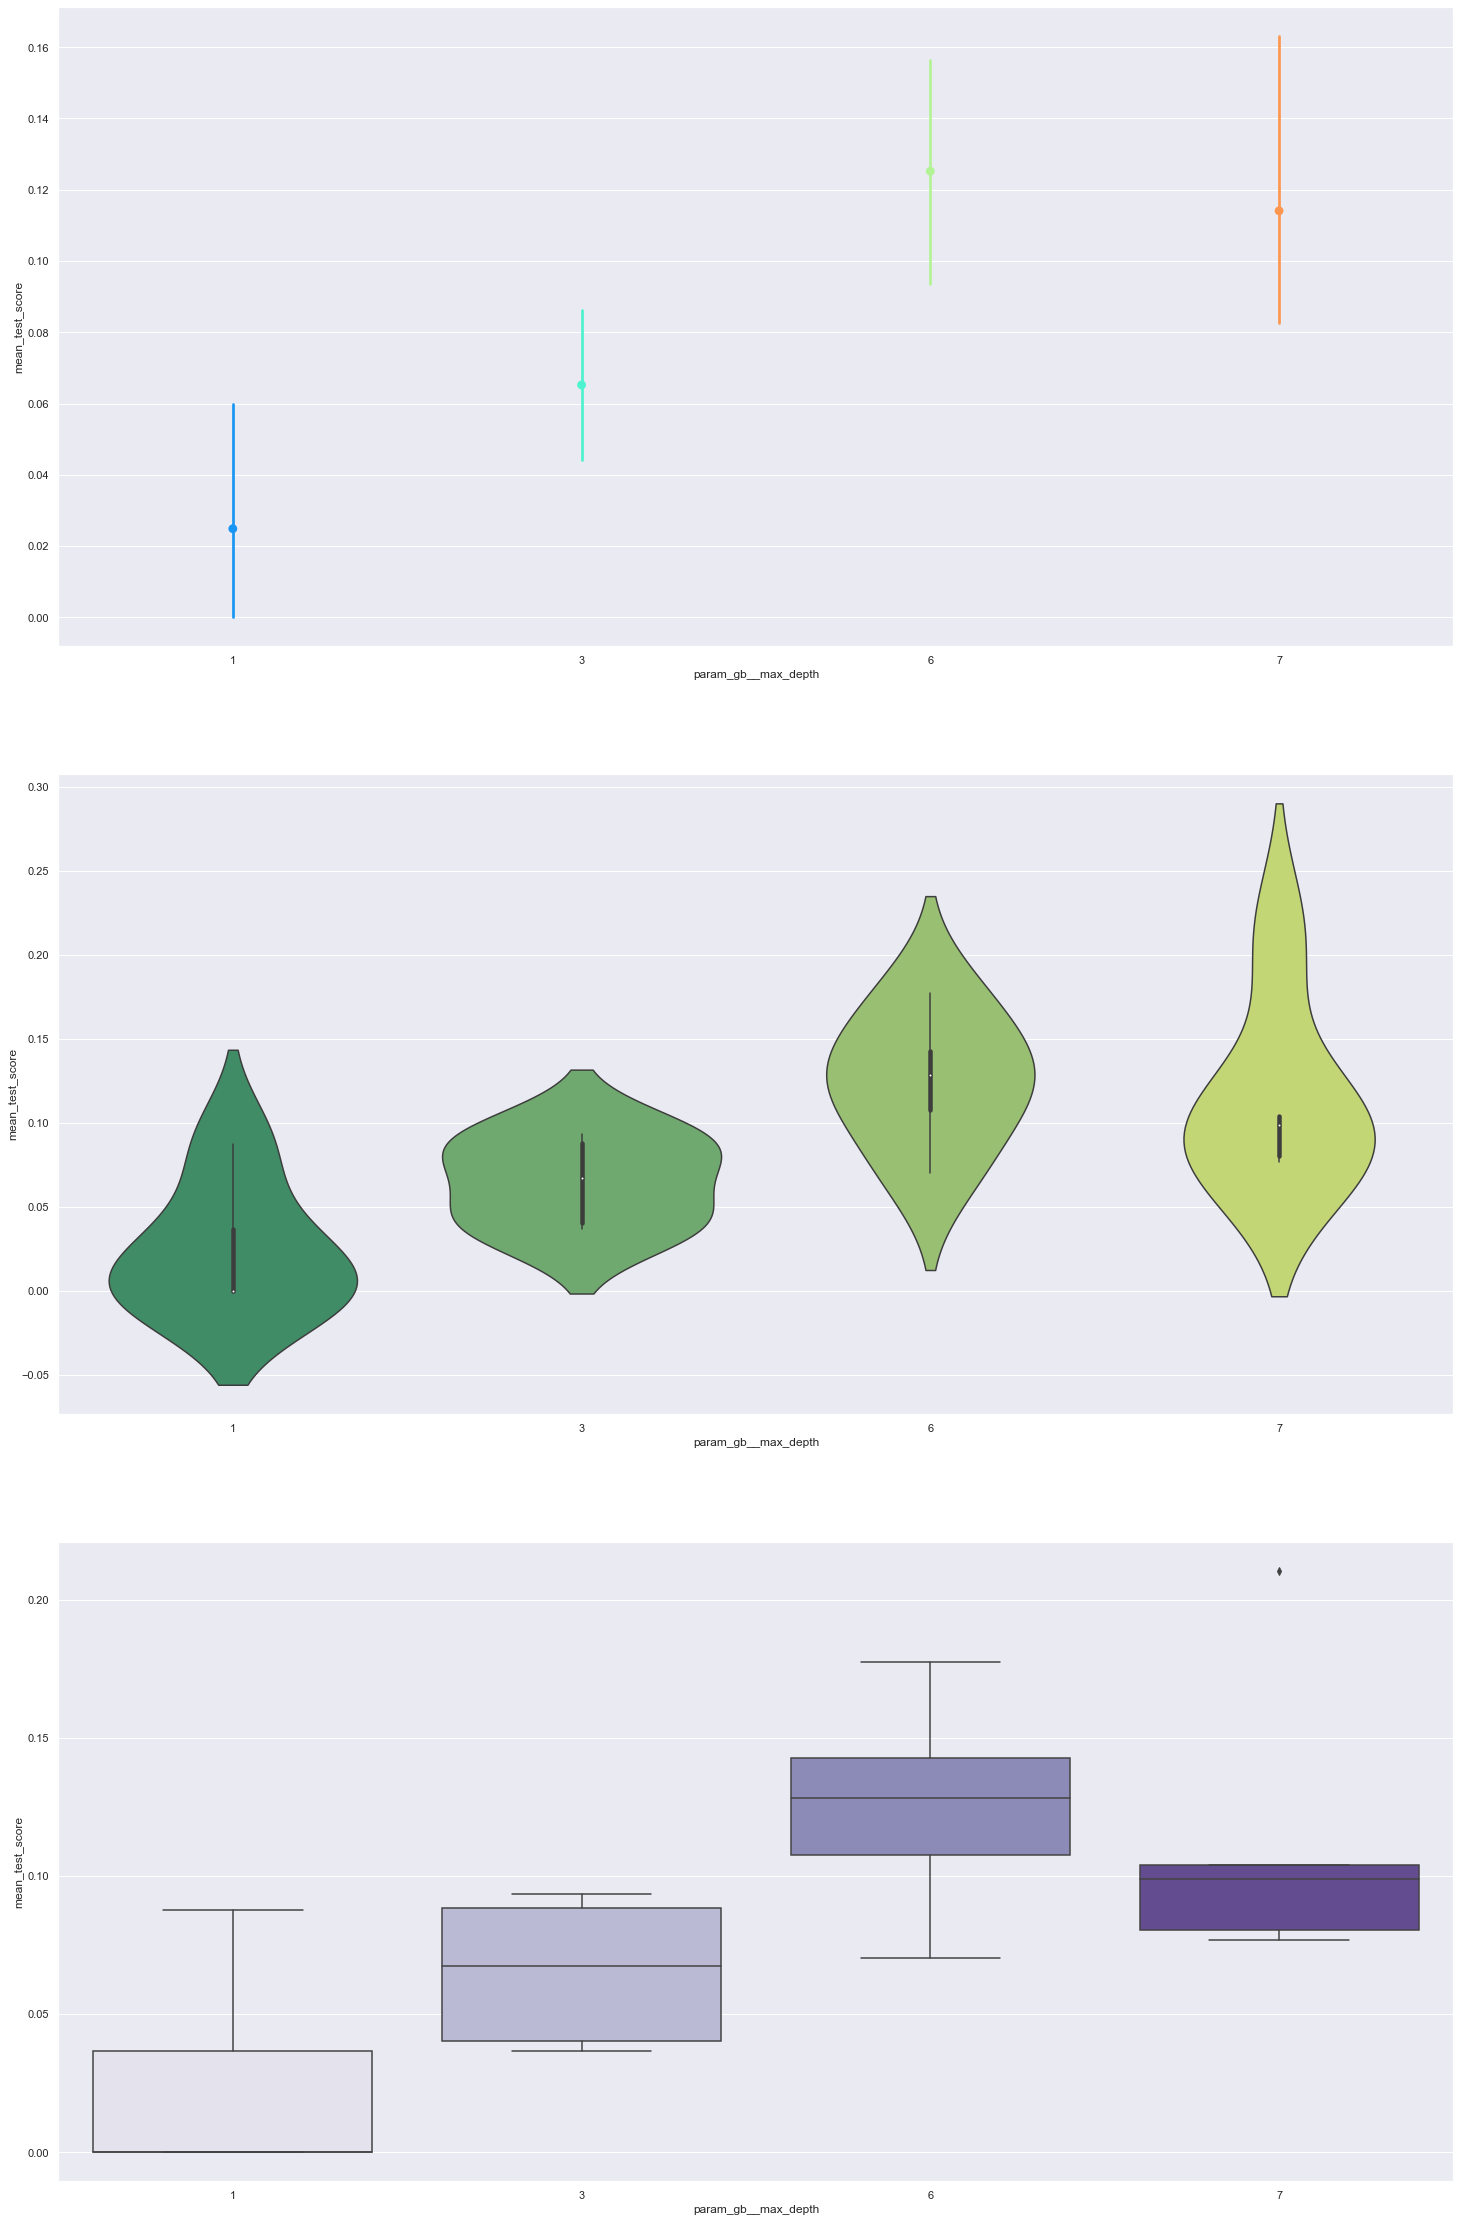

In [760]:
#Plotting dependency
fig,ax = plt.subplots(3,1,figsize=(25,40))
ax1,ax2, ax3 = ax.flatten()
sns.pointplot(x=Cv_results.param_gb__max_depth, y = Cv_results.mean_test_score,ax=ax1, palette = "rainbow")
sns.violinplot(x=Cv_results.param_gb__max_depth, y = Cv_results.mean_test_score,ax=ax2, palette = 'summer')
sns.boxplot( x=Cv_results.param_gb__max_depth, y = Cv_results.mean_test_score, ax=ax3, palette="Purples")

## Precision-Recall curves:

In [761]:
from inspect import signature

def pr_plot(recall, precision, c): #Function that is going to build PR curve
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color=c, **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

In [770]:
from sklearn.metrics import precision_recall_curve
#fitting and predicting by using existing pipelines
pipe_lcv.fit(X_train, y_train)
pipe_gbcv.fit(X_train, y_train)
y_pred_log = pipe_lcv.predict(X_test)
y_pred_Gradient=pipe_gbcv.predict(X_test)



In [771]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_log)
precision_lt, recall_lt, _ = precision_recall_curve(y_test, y_pred_Gradient)

**PR on the test data**

(None, None)

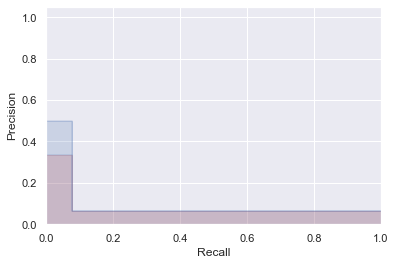

In [772]:
pr_plot(recall, precision, c = 'b'), pr_plot(recall_lt, precision_lt,c = 'r')
#Blue is for Logistic Regression
#Red is for Gradient Boosting

**PR on the train data**

In [773]:
#predicting by using existing pipelines
y_pred_logistic_train = pipe_lcv.predict(X_train)
y_pred_Gradient_train=pipe_gbcv.predict(X_train)
precision_l, recall_l, _ = precision_recall_curve(y_train, y_pred_logistic_train)
precision_b, recall_b, _ = precision_recall_curve(y_train, y_pred_Gradient_train)

(None, None)

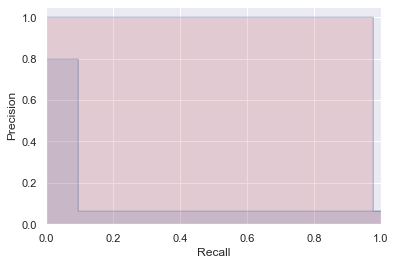

In [774]:
pr_plot(recall_l, precision_l,c = 'b'), pr_plot(recall_b, precision_b, c = 'r')
#Red is for Gradient Boosting
#Blue is for Logistic Regression

**Linear Regression algorithm has better Precision-Recall curve(it is located higher(blue color)) on test data, than Gradient Boosting.**

# Conclusion

In my homework, I applied two methods in exploring a data set about cervical cancer: logistic regression and gradient boosting.

When i was researching the data set, I found that it is very unbalanced(~800 healthy individuals, ~50 individuals with cancer), so f1(precision and recall) was chosen as the metric.
I have chosen Biopsy as a target for my models, as it is the standard for determining cancer and has high correlation with other features of the data 

Unfortunately, my models show a low F1 scores: Linear Regression(class '0' : f1_score = 0,97; class '1' : f1_score = 0.13) and Gradient Boosting(class '0' : f1_score = 0,97; class '1' : f1_score =  0,22)
This is due to several reasons: a very unbalanced date and the target I selected. I could improve these models a bit by using the targeting of several columns, for example Biopsy and Hinselmann tests.

At least I got some experience in applying these models, because new in data science and doing it for the first time